In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

income = pd.read_csv("../Data/income.csv")

income.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [29]:
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000", 0, 1),
            nativecountry = data["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
            occupation = data["occupation"].replace({" Armed-Forces": " ?"}),
            JobType = data["JobType"].replace({" Never-worked": " Without-pay"}),
        ).drop("SalStat", axis=1), 
        drop_first=True
    )
    X = data.drop("target", axis=1)
    y = data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [30]:
X_train, X_test, y_train, y_test = income_model_prep(income) 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression(max_iter=5000)

lr.fit(X_train, y_train)

print(f"Accuracy: {lr.score(X_test, y_test)}")
print(f"F1: {f1_score(y_test, lr.predict(X_test))}")

Accuracy: 0.8556910569105691
F1: 0.669294159799355


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Assignment 1: Sampling Methods

The following steps can be done one by one or in a single cell.

1. Undersample the data to a 2:1 ratio of 0s to 1s and fit a logistic regression - generate a confusion matrix and calculate common evaluation metrics (Accuracy, Precision Recall, F1). 

2. Oversample the data using random oversampling.Create 4x the the current number of 1s. and fit a logistic regression - generate a confusion matrix and calculate common evaluation metrics. 

3. Use SMOTE to oversample the data. Create 4x the the current number of 1s. Fit a logistic regression and generate a confusion matrix, as well as calculate common evaluation metrics. 

4. Which model sampling approach best for this data? Pick the one that gave the best performance at the default threshold, then tune the threshold and report optimized F1 score.

### Undersampling

In [32]:
import imblearn.under_sampling as US 

# randomly undersample negative samples: 
RUS = US.RandomUnderSampler(
                   sampling_strategy = 1/2,
                   random_state=2023
)

X_train_rs, y_train_rs = RUS.fit_resample(X_train, y_train)

print(f"Original Negative Class Count: {np.mean(y_train)}")
print(f"Undersample Negative Class Count: {np.mean(y_train_rs)}")

lr.fit(X_train_rs, y_train_rs)

Original Negative Class Count: 0.2415761082010789
Undersample Negative Class Count: 0.3333333333333333


Accuracy: 0.8491244527829893
Precision: 0.6712328767123288
Recall: 0.7115511551155116
F1: 0.6908042294136495


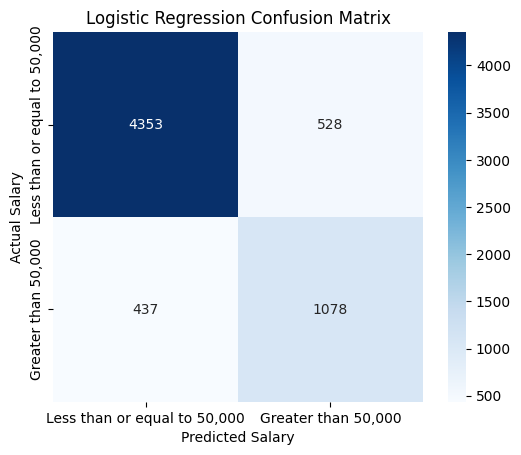

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy: {accuracy_score(y_test, lr.predict(X_test))}")
print(f"Precision: {precision_score(y_test, lr.predict(X_test))}")
print(f"Recall: {recall_score(y_test, lr.predict(X_test))}")
print(f"F1: {f1_score(y_test, lr.predict(X_test))}")

lr_confusion = confusion_matrix(y_test, lr.predict(X_test))
                                 
sns.heatmap(
    lr_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Less than or equal to 50,000", "Greater than 50,000"],        
    yticklabels=["Less than or equal to 50,000", "Greater than 50,000"]
).set(
    xlabel='Predicted Salary',
    ylabel='Actual Salary',
    title='Logistic Regression Confusion Matrix'
);

### Oversampling

In [37]:
import imblearn.over_sampling as OS

n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)

# create 4x as many positive samples
ratio = {1 : n_pos * 4, 0 : n_neg}

# randomly oversample positives
ROS = OS.RandomOverSampler(
    sampling_strategy = ratio,
    random_state=2023
)

X_train_rs, y_train_rs = ROS.fit_resample(X_train, y_train)

print(f"Original Positive Class Count: {np.sum(y_train)}")
print(f"Oversample Positive Class Count: {np.sum(y_train_rs)}")

lr.fit(X_train_rs, y_train_rs)

Original Positive Class Count: 6180
Oversample Positive Class Count: 24720


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

Accuracy: 0.7898686679174484
Precision: 0.5337012219156484
Recall: 0.8937293729372937
F1: 0.6683119447186574


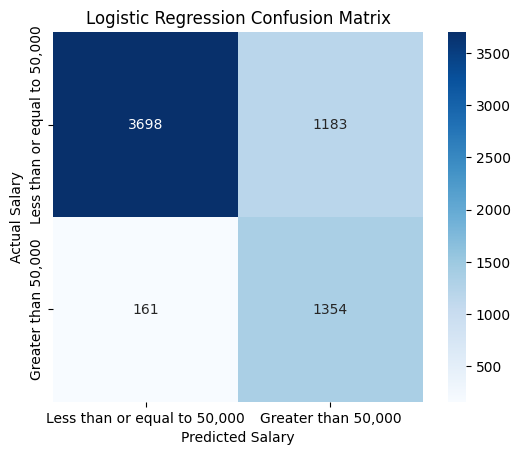

In [38]:
print(f"Accuracy: {accuracy_score(y_test, lr.predict(X_test))}")
print(f"Precision: {precision_score(y_test, lr.predict(X_test))}")
print(f"Recall: {recall_score(y_test, lr.predict(X_test))}")
print(f"F1: {f1_score(y_test, lr.predict(X_test))}")

lr_confusion = confusion_matrix(y_test, lr.predict(X_test))
                                 
sns.heatmap(
    lr_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Less than or equal to 50,000", "Greater than 50,000"],        
    yticklabels=["Less than or equal to 50,000", "Greater than 50,000"]
).set(
    xlabel='Predicted Salary',
    ylabel='Actual Salary',
    title='Logistic Regression Confusion Matrix'
);

### SMOTE

In [40]:
import imblearn.over_sampling

n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)

# create 4x as many positive samples
ratio = {1 : n_pos * 4, 0 : n_neg}

# SMOTE oversampling for positives
smt = OS.SMOTE(
    sampling_strategy = ratio,
    random_state=2023
)

X_train_rs, y_train_rs = smt.fit_resample(X_train, y_train)


print(f"Original Positive Class Count: {np.sum(y_train)}")
print(f"Oversample Positive Class Count: {np.sum(y_train_rs)}")

lr.fit(X_train_rs, y_train_rs)

Original Positive Class Count: 6180
Oversample Positive Class Count: 24720


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

Accuracy: 0.8252032520325203
Precision: 0.6053050397877984
Recall: 0.7531353135313531
F1: 0.6711764705882353


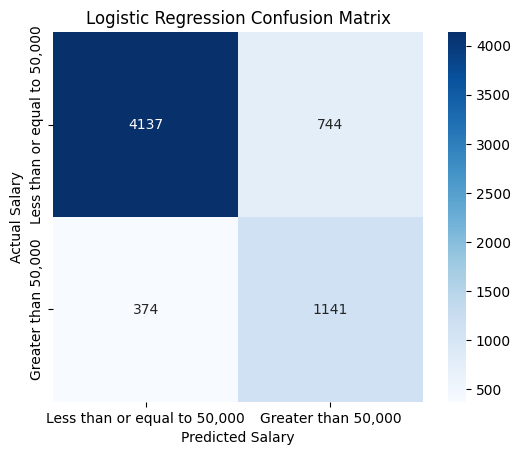

In [41]:
print(f"Accuracy: {accuracy_score(y_test, lr.predict(X_test))}")
print(f"Precision: {precision_score(y_test, lr.predict(X_test))}")
print(f"Recall: {recall_score(y_test, lr.predict(X_test))}")
print(f"F1: {f1_score(y_test, lr.predict(X_test))}")

lr_confusion = confusion_matrix(y_test, lr.predict(X_test))
                                 
sns.heatmap(
    lr_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Less than or equal to 50,000", "Greater than 50,000"],        
    yticklabels=["Less than or equal to 50,000", "Greater than 50,000"]
).set(
    xlabel='Predicted Salary',
    ylabel='Actual Salary',
    title='Logistic Regression Confusion Matrix'
);

Baseline
- F1: 0.669294159799355

Undersampled
- F1: 0.6908042294136495
  
Oversampled
- F1: 0.6683119447186574
  
Undersampled
- F1: 0.6711764705882353



c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8214509068167605
Precision: 0.5873536299765808
Recall: 0.8277227722772277
F1: 0.6871232876712329


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8275484677923702
Precision: 0.5999030067895247
Recall: 0.8165016501650165
F1: 0.6916410399776349


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8319262038774234
Precision: 0.61
Recall: 0.8052805280528053
F1: 0.6941678520625889


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8375547217010632
Precision: 0.6234439834024896
Recall: 0.7933993399339934
F1: 0.6982282892826024


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8398999374609131
Precision: 0.6312132549438803
Recall: 0.7795379537953795
F1: 0.6975782634376846


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8434959349593496
Precision: 0.6426193118756937
Recall: 0.7643564356435644
F1: 0.6982212842930359


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8449030644152595
Precision: 0.6502010338885698
Recall: 0.7471947194719472
F1: 0.6953316953316954


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8475609756097561
Precision: 0.6591981132075472
Recall: 0.737953795379538
F1: 0.6963562753036437


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8483427141963727
Precision: 0.6652516676773802
Recall: 0.7240924092409241
F1: 0.6934260429835651
Accuracy: 0.8491244527829893
Precision: 0.6712328767123288
Recall: 0.7115511551155116
F1: 0.6908042294136495


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

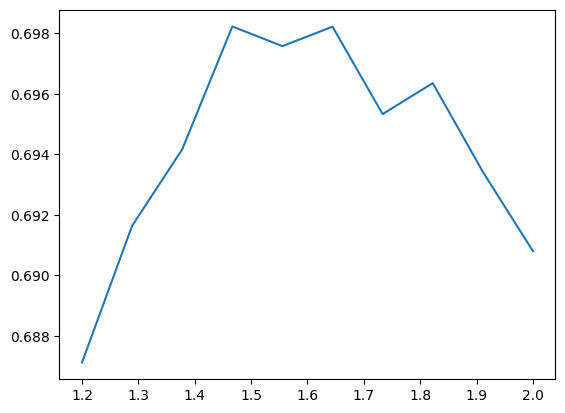

In [65]:
import imblearn.under_sampling as US 
f1 = []

undersampling_ratio = np.linspace(1.4, 1.5, 10)

for thresh in undersampling_ratio:
    # randomly undersample negative samples: 
    RUS = US.RandomUnderSampler(
                    sampling_strategy = 1/thresh,
                    random_state=2023
    )

    X_train_rs, y_train_rs = RUS.fit_resample(X_train, y_train)

    lr.fit(X_train_rs, y_train_rs)

    print(f"Thresh: {thresh}\n")
    print(f"Accuracy: {accuracy_score(y_test, lr.predict(X_test))}")
    print(f"Precision: {precision_score(y_test, lr.predict(X_test))}")
    print(f"Recall: {recall_score(y_test, lr.predict(X_test))}")
    print(f"F1: {f1_score(y_test, lr.predict(X_test))}")

    y_pred =(lr.predict_proba(X_train)[:,1]>thresh)
    f1.append(f1_score(y_test, lr.predict(X_test)))
    
sns.lineplot(x=undersampling_ratio, y=f1)

c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.4
Accuracy: 0.8339587242026266
Precision: 0.6156202143950995
Recall: 0.7960396039603961
F1: 0.694300518134715


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.411111111111111
Accuracy: 0.8348968105065666
Precision: 0.6172713336739908
Recall: 0.7973597359735973
F1: 0.695852534562212


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.422222222222222
Accuracy: 0.8352095059412132
Precision: 0.6176620724859623
Recall: 0.7986798679867987
F1: 0.6966033390903857


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.4333333333333333
Accuracy: 0.8366166353971232
Precision: 0.6212590299277606
Recall: 0.7947194719471947
F1: 0.6973646104836374


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.4444444444444444
Accuracy: 0.8367729831144465
Precision: 0.6210796915167095
Recall: 0.7973597359735973
F1: 0.6982658959537572


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.4555555555555555
Accuracy: 0.8369293308317699
Precision: 0.622279792746114
Recall: 0.7927392739273927
F1: 0.6972423802612482


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.4666666666666666
Accuracy: 0.8375547217010632
Precision: 0.6234439834024896
Recall: 0.7933993399339934
F1: 0.6982282892826024


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.4777777777777779
Accuracy: 0.8367729831144465
Precision: 0.6225923997917752
Recall: 0.7894389438943894
F1: 0.6961583236321304


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.488888888888889
Accuracy: 0.8369293308317699
Precision: 0.6230448383733055
Recall: 0.7887788778877888
F1: 0.6961840955432567
1.5
Accuracy: 0.8373983739837398
Precision: 0.6251976805482341
Recall: 0.7828382838283828
F1: 0.6951934349355217


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

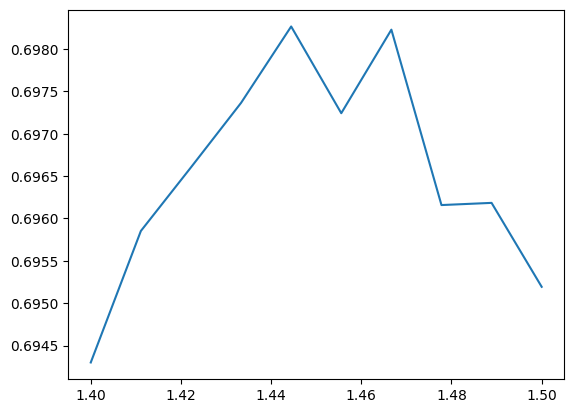

In [67]:
import imblearn.under_sampling as US 
f1 = []

undersampling_ratio = np.linspace(1.4, 1.5, 10)

for thresh in undersampling_ratio:
    # randomly undersample negative samples: 
    RUS = US.RandomUnderSampler(
                    sampling_strategy = 1/thresh,
                    random_state=2023
    )

    X_train_rs, y_train_rs = RUS.fit_resample(X_train, y_train)

    lr.fit(X_train_rs, y_train_rs)

    print(f"Thresh: {thresh}\n")
    print(f"Accuracy: {accuracy_score(y_test, lr.predict(X_test))}")
    print(f"Precision: {precision_score(y_test, lr.predict(X_test))}")
    print(f"Recall: {recall_score(y_test, lr.predict(X_test))}")
    print(f"F1: {f1_score(y_test, lr.predict(X_test))}")

    y_pred =(lr.predict_proba(X_train)[:,1]>thresh)
    f1.append(f1_score(y_test, lr.predict(X_test)))
    
sns.lineplot(x=undersampling_ratio, y=f1)


Original Negative Class Count: 0.2415761082010789
Undersample Negative Class Count: 0.4091089633258308


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8367729831144465
Precision: 0.6210796915167095
Recall: 0.7973597359735973
F1: 0.6982658959537572


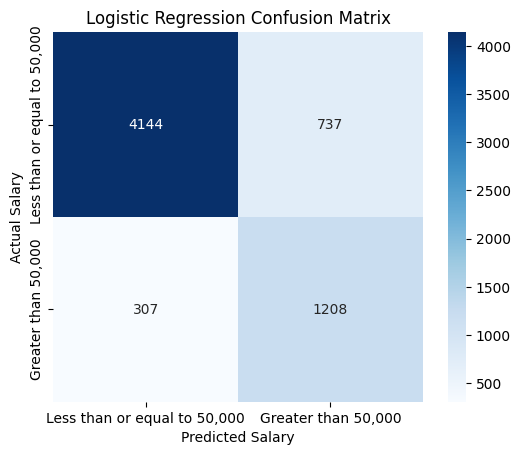

In [68]:
import imblearn.under_sampling as US 

# randomly undersample negative samples: 
RUS = US.RandomUnderSampler(
                   sampling_strategy = 1/1.4444444444444444,
                   random_state=2023
)

X_train_rs, y_train_rs = RUS.fit_resample(X_train, y_train)

print(f"Original Negative Class Count: {np.mean(y_train)}")
print(f"Undersample Negative Class Count: {np.mean(y_train_rs)}")

lr.fit(X_train_rs, y_train_rs)

print(f"Accuracy: {accuracy_score(y_test, lr.predict(X_test))}")
print(f"Precision: {precision_score(y_test, lr.predict(X_test))}")
print(f"Recall: {recall_score(y_test, lr.predict(X_test))}")
print(f"F1: {f1_score(y_test, lr.predict(X_test))}")

lr_confusion = confusion_matrix(y_test, lr.predict(X_test))
                                 
sns.heatmap(
    lr_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Less than or equal to 50,000", "Greater than 50,000"],        
    yticklabels=["Less than or equal to 50,000", "Greater than 50,000"]
).set(
    xlabel='Predicted Salary',
    ylabel='Actual Salary',
    title='Logistic Regression Confusion Matrix'
);

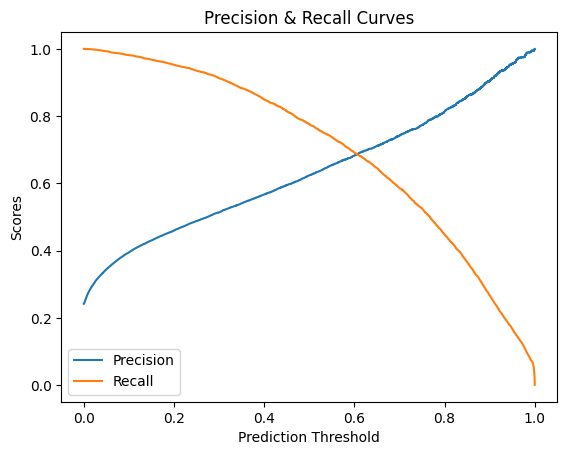

In [71]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr.predict_proba(X_train)[:,1])

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.legend()
plt.title('Precision & Recall Curves')
plt.show()

0.55

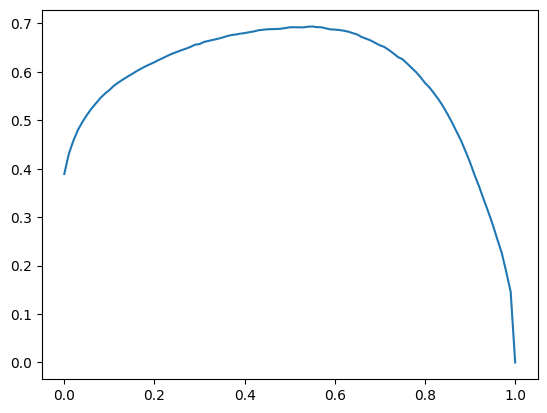

In [72]:
from sklearn.metrics import f1_score

f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred =(lr.predict_proba(X_train)[:,1]>thresh)
    f1.append(f1_score(y_train, y_pred))
    
sns.lineplot(x=thresholds, y=f1)

thresh = thresholds[f1.index(max(f1))]

thresh

In [75]:
preds = lr.predict_proba(X_test)[:, 1] > thresh

print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1: {f1_score(y_test, preds)}")

Accuracy: 0.8447467166979362
Precision: 0.6505190311418685
Recall: 0.7445544554455445
F1: 0.6943674976915974


In [76]:
import imblearn.over_sampling as OS
import imblearn.under_sampling as US

logreg = LogisticRegression(max_iter=5000)

lr = logreg.fit(X_train, y_train)

# randomly undersample negative samples: 
RUS = US.RandomUnderSampler(
                   sampling_strategy = 1 / 2,
                   random_state=2023
)

X_train_us, y_train_us = RUS.fit_resample(X_train, y_train)

lr_us = logreg.fit(X_train_us, y_train_us)

# Oversampling
# create 4x as many positive samples

n_pos = y_train.sum()
n_neg = len(y_train) - n_pos
ratio = {1 : n_pos * 4, 0 : n_neg}

# randomly oversample positives
ROS = OS.RandomOverSampler(
    sampling_strategy = ratio,
    random_state=2023
)

X_train_os, y_train_os = ROS.fit_resample(X_train, y_train)

lr_os = logreg.fit(X_train_os, y_train_os)


# SMOTE oversampling for positives
smt = OS.SMOTE(
    sampling_strategy = ratio,
    random_state=2023
)

X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

lr_smt = logreg.fit(X_train_smt, y_train_smt)



# Training Accuracy

print(f"Normal Accuracy: {lr.score(X_train, y_train)}")
print(f"Undersample Accuracy: {lr_us.score(X_train_us, y_train_us)}")
print(f"Oversample Accuracy: {lr_os.score(X_train_os, y_train_os)}")
print(f"SMOTE Accuracy: {lr_smt.score(X_train_smt, y_train_smt)}")

c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Normal Accuracy: 0.8185051989680244
Undersample Accuracy: 0.8090614886731392
Oversample Accuracy: 0.7828747563573727
SMOTE Accuracy: 0.8784053306740401


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
print(f"Normal F1: {f1_score(y_train, lr.predict(X_train))}")
print(f"Undersample F1: {f1_score(y_train_us, lr_us.predict(X_train_us))}")
print(f"Oversample F1: {f1_score(y_train_os, lr_os.predict(X_train_os))}")
print(f"SMOTE F1: {f1_score(y_train_smt, lr_smt.predict(X_train_smt))}")

Normal F1: 0.6630868587185255
Undersample F1: 0.7207761476573592
Oversample F1: 0.7913944778329414
SMOTE F1: 0.8929974670416243


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Thresh: 9.0

SMOTE F1: 0.6547587310050653


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Thresh: 14.5

SMOTE F1: 0.6427845528455285
Thresh: 20.0

SMOTE F1: 0.6350148367952523


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

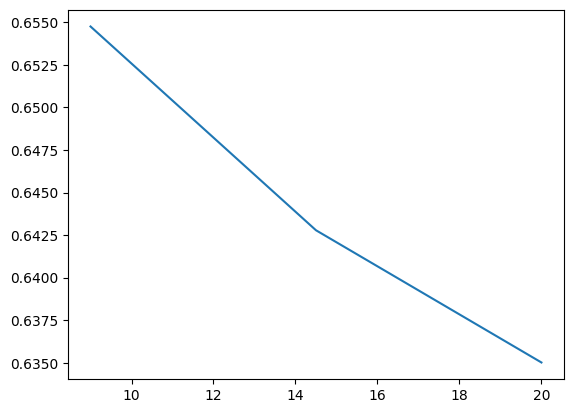

In [85]:
import imblearn.over_sampling as OS
import imblearn.under_sampling as US

logreg = LogisticRegression(max_iter=5000)

f1 = []

n_pos = y_train.sum()
n_neg = len(y_train) - n_pos
n_pos_values = np.linspace(9, 20, 3)

for n_pos_value in n_pos_values:
    ratio = {1 : n_pos * int(n_pos_value), 0 : n_neg}
    
    # SMOTE oversampling for positives
    smt = OS.SMOTE(
        sampling_strategy = ratio,
        random_state=2023
    )

    X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

    lr_smt = logreg.fit(X_train_smt, y_train_smt)

    print(f"Thresh: {n_pos_value}\n")
    print(f"SMOTE F1: {f1_score(y_test, lr_smt.predict(X_test))}")

    f1.append(f1_score(y_test, lr_smt.predict(X_test)))
    
sns.lineplot(x=n_pos_values, y=f1)

## Assignment 2: Class Weights

1. Fit a regression with standard, balanced and 4:1 (minority vs majority) class weights. Calculate the AUC for each.
2. For the weighting that had the best AUC, tune the threshold to maximize F1 score.


Original Negative Class Count: 0.2415761082010789
Undersample Negative Class Count: 0.4091089633258308


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8367729831144465
Precision: 0.6210796915167095
Recall: 0.7973597359735973
F1: 0.6982658959537572


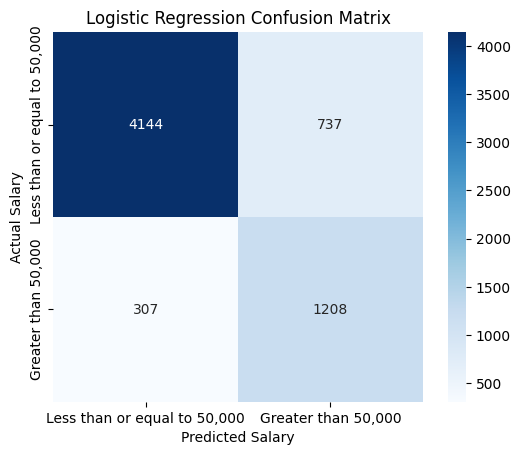

In [84]:
import imblearn.under_sampling as US 

# randomly undersample negative samples: 
RUS = US.RandomUnderSampler(
                   sampling_strategy = 1/1.4444444444444444,
                   random_state=2023
)

X_train_rs, y_train_rs = RUS.fit_resample(X_train, y_train)

print(f"Original Negative Class Count: {np.mean(y_train)}")
print(f"Undersample Negative Class Count: {np.mean(y_train_rs)}")

lr.fit(X_train_rs, y_train_rs)

print(f"Accuracy: {accuracy_score(y_test, lr.predict(X_test))}")
print(f"Precision: {precision_score(y_test, lr.predict(X_test))}")
print(f"Recall: {recall_score(y_test, lr.predict(X_test))}")
print(f"F1: {f1_score(y_test, lr.predict(X_test))}")

lr_confusion = confusion_matrix(y_test, lr.predict(X_test))
                                 
sns.heatmap(
    lr_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Less than or equal to 50,000", "Greater than 50,000"],        
    yticklabels=["Less than or equal to 50,000", "Greater than 50,000"]
).set(
    xlabel='Predicted Salary',
    ylabel='Actual Salary',
    title='Logistic Regression Confusion Matrix'
);

c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7879924953095685
Precision: 0.5309218203033839
Recall: 0.900990099009901
F1: 0.6681350954478708


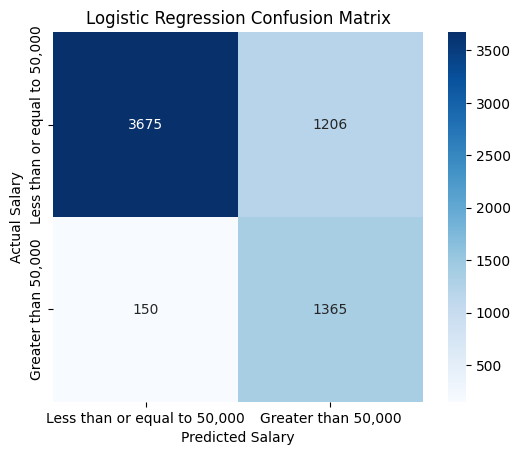

In [83]:
import imblearn.under_sampling as US 
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, class_weight={1: 4, 0: 1})

# randomly undersample negative samples: 
RUS = US.RandomUnderSampler(
                   sampling_strategy = 1/1.4444444444444444,
                   random_state=2023
)

X_train_rs, y_train_rs = RUS.fit_resample(X_train, y_train)

lr_weighted = logreg.fit(X_train, y_train)

print(f"Accuracy: {accuracy_score(y_test, lr_weighted.predict(X_test))}")
print(f"Precision: {precision_score(y_test, lr_weighted.predict(X_test))}")
print(f"Recall: {recall_score(y_test, lr_weighted.predict(X_test))}")
print(f"F1: {f1_score(y_test, lr_weighted.predict(X_test))}")

lr_confusion = confusion_matrix(y_test, lr_weighted.predict(X_test))
                                 
sns.heatmap(
    lr_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Less than or equal to 50,000", "Greater than 50,000"],        
    yticklabels=["Less than or equal to 50,000", "Greater than 50,000"]
).set(
    xlabel='Predicted Salary',
    ylabel='Actual Salary',
    title='Logistic Regression Confusion Matrix'
);